In [1]:
import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm
from glob import glob
from keras.layers import *
from keras.models import *
from keras.utils import *
import numpy as np
import os

In [2]:
'''
#!pip install livelossplot
!python -m pip install --upgrade pip
%matplotlib inline
!pip install Livelossplot
'''

'\n#!pip install livelossplot\n!python -m pip install --upgrade pip\n%matplotlib inline\n!pip install Livelossplot\n'

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#!pip install livelossplot
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#!pip install Livelossplot
#from Livelossplot import PlotLossesKeras

from glob import glob
import os
import shutil

import numpy as np
import pandas as pd
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
sampling_seed=0
size_4_training=1000
epoch_4_test=70
#img_size=224
#training_reshape=(-1, img_size, img_size, 3)

# **Loading Training Files**

I have converted all images to numpy array to boost speed

In [5]:

os.makedirs('../working/data/train_seg/idc-minus/')     
os.makedirs('../working/data/train_seg/idc-plus/')  
os.makedirs('../working/data/test_seg/idc-minus/')     
os.makedirs('../working/data/test_seg/idc-plus/')  
os.makedirs('../working/data/val_seg/idc-minus/')     
os.makedirs('../working/data/val_seg/idc-plus/')  
os.mkdir('./History')

In [6]:
import random
from sklearn.model_selection import train_test_split

import shutil
from glob import glob 
#make directory for labelling

train_dir='../working/data/train_seg/'
validation_dir='../working/data/val_seg/'
#train_dir='../working/data/train_seg/'  
#test_dir = '../working/data/test_seg/normal'  
test_dir = '../working/data/test_seg/'  

class0 = [] # 0 = idc+
class1 = [] # 1 = idc-
imagePatches = glob('../input/breast-histopathology-images/IDC_regular_ps50_idx5/**/*.png', recursive=True)
for filename in imagePatches:
    if filename.endswith("class0.png"):
         class0.append(filename)
    else:
        class1.append(filename)

print(class0[0:10])

#sampling 10000 images from class 0 and class 1 to train the model

random.seed(sampling_seed)
class0sample=random.sample(class0,size_4_training)
class0label=np.zeros(size_4_training)
class1sample=random.sample(class1,size_4_training)
class1label=np.ones(size_4_training)

class0sample_train, class0sample_test1, class0label_train, class0label_test1 = train_test_split(class0sample, class0label, test_size=0.3, random_state=42)
class0sample_val, class0sample_test, class0label_val, class0label_test = train_test_split(class0sample_test1, class0label_test1, test_size=0.3, random_state=42)
print(len(class0sample_train))
print(len(class0sample_test))
print(len(class0sample_val))
class1sample_train, class1sample_test1, class1label_train, class1label_test1 = train_test_split(class1sample, class1label, test_size=0.3, random_state=42)
class1sample_val, class1sample_test, class1label_val, class1label_test = train_test_split(class1sample_test1, class1label_test1, test_size=0.3, random_state=42)
print(len(class1sample_train))
print(len(class1sample_test))
print(len(class1sample_val))
def read_and_save_data(path, file_name_array):
    j=0
    for i in file_name_array:
        if i.endswith('.png'):
          
            
            #second copy method
            head, tail = os.path.split(i)
            outputname=str(path+tail)
            #outputname=str(path+str(j)+'.png')
            print(outputname)
            shutil.copy(i, outputname)
   
            #print(status2)
            
            j=j+1
            if j==120000:
                break
            
   
class0train_path='../working/data/train_seg/idc-minus/'
class1train_path='../working/data/train_seg/idc-plus/'
class0test_path='../working/data/test_seg/idc-minus/'
class1test_path='../working/data/test_seg/idc-plus/'
class0val_path='../working/data/val_seg/idc-minus/'
class1val_path='../working/data/val_seg/idc-plus/'

read_and_save_data(class0train_path,class0sample_train)
read_and_save_data(class1train_path,class1sample_train)


read_and_save_data(class0test_path,class0sample_test)
read_and_save_data(class1test_path,class1sample_test)


read_and_save_data(class0val_path,class0sample_val)
read_and_save_data(class1val_path,class1sample_val)

['../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y1101_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y501_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y1101_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x451_y901_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x801_y451_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x151_y1051_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y901_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x701_y651_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x951_y1401_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/102

In [7]:
import os #Operating System
import sys #System
# train_generator = train_datagen.flow(x_train, y_train, batch_size =)
# val_generator = val_datagen.flow(x_val, y_val, batch_size = 64)
# test_generator=test_datagen.flow(x_test,y_test,batch_size = 64)


In [8]:
import os
import cv2
def readImage(path, tag):
    j=0
    image_data = []
    label=[]
    for i in os.listdir(path):
        imgname=path+i
        #print(imgname)
        img = cv2.imread(imgname, cv2.IMREAD_COLOR)
        img_resized = cv2.resize(img, (128,128), interpolation=cv2.INTER_LINEAR)
        image_data.append(img_resized)
        label.append(tag)
        #print(img[1])
        j=j+1
        #if j==10:
        #    break
        
    return image_data, label

import numpy as np
from tensorflow.keras.utils import *
from sklearn.utils import shuffle

class0_train, train0_label = readImage(class0train_path, 0)
class1_train, train1_label  = readImage(class1train_path, 1)
class0_test, test0_label = readImage(class0test_path, 0)
class1_test, test1_label = readImage(class1test_path, 1)
class0_val, val0_label = readImage(class0val_path, 0)
class1_val, val1_label = readImage(class1val_path, 1)

def Image_array_process(class0array,label0, class1array, label1):
    class0_array=np.array(class0array)
    class1_array=np.array(class1array)
    combined_data = np.concatenate((class0_array, class1_array))
    combined_label= np.concatenate((label0,label1), axis=0)
    assert len(combined_data) == len(combined_label)
    combined_data, combined_label = shuffle(combined_data, combined_label, random_state=0)
    print(combined_data.shape)
    length=len(combined_data)
    combined_label=to_categorical(combined_label,num_classes=2)
    i=0
    for i in range(length):
        print(combined_label[i])

    print

    #print(class0_array.shape)
    #print(combined_data.shape)
    '''
    training_reshape=(224,224,3)
    length=len(combined_data)
    print(length)
    x =[None]*length
    #print(img_data.type)
    y =np.zeros(length)
    i=0
   
    for features,label in combined_data:
        x[i]=features
        #print(x.shape)
        y[i]=label
        #print(y[i])
        i=i+1
    
            #x = np.array(x).reshape(training_reshape)
    x = np.array(x)    
    #print(x.shape)
    #y=np.array(y)
    y=y.astype(int)
    y = to_categorical(y)
    print(y)
    '''  
    return combined_data, combined_label


X_train, y_train=Image_array_process(class0_train, train0_label, class1_train, train1_label)
X_test, y_test=Image_array_process(class0_test, test0_label, class1_test, test1_label)
X_val, y_val=Image_array_process(class0_val, val0_label, class1_val, val1_label)

(1400, 128, 128, 3)
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 

In [9]:
'''
import numpy as np


class0_array = readImage(class0path, 0)
class1_array = readImage(class1path, 1)

class0_array=np.array(class0_array)
class1_array=np.array(class1_array)
combined_data = np.concatenate((class0_array, class1_array))
random.seed(41)
random.shuffle(combined_data)
print(class0_array.shape)
print(class1_array.shape)

X = []
y = []

for features,label in combined_data:
    X.append(features)
    y.append(label)
#print(X.shape)
#print(y.shape)

# reshape X data
train_data = np.array(X).reshape(training_reshape)
train_label=np.array(y)
print(y[19990:19999])
print(train_data.shape)
print(train_label.shape)
'''

'\nimport numpy as np\n\n\nclass0_array = readImage(class0path, 0)\nclass1_array = readImage(class1path, 1)\n\nclass0_array=np.array(class0_array)\nclass1_array=np.array(class1_array)\ncombined_data = np.concatenate((class0_array, class1_array))\nrandom.seed(41)\nrandom.shuffle(combined_data)\nprint(class0_array.shape)\nprint(class1_array.shape)\n\nX = []\ny = []\n\nfor features,label in combined_data:\n    X.append(features)\n    y.append(label)\n#print(X.shape)\n#print(y.shape)\n\n# reshape X data\ntrain_data = np.array(X).reshape(training_reshape)\ntrain_label=np.array(y)\nprint(y[19990:19999])\nprint(train_data.shape)\nprint(train_label.shape)\n'

In [10]:
'''
label_normal = np.zeros(len(normal))
label_bacterial = np.ones(len(bacterial))
label_viral = np.full(len(viral),2, dtype = int)
train_data = np.concatenate((normal,bacterial,viral),axis=0)
train_label = np.concatenate((label_normal,label_bacterial,label_viral),axis=0)
train_label.shape, train_data.shape
'''

'\nlabel_normal = np.zeros(len(normal))\nlabel_bacterial = np.ones(len(bacterial))\nlabel_viral = np.full(len(viral),2, dtype = int)\ntrain_data = np.concatenate((normal,bacterial,viral),axis=0)\ntrain_label = np.concatenate((label_normal,label_bacterial,label_viral),axis=0)\ntrain_label.shape, train_data.shape\n'

In [11]:
'''
#!pip install sklearn
from sklearn.model_selection import train_test_split
train_data, test1_data, train_label, test1_label = train_test_split(train_data, train_label, test_size=0.3, random_state=42)
val_data, test_data, val_label, test_label = train_test_split(test1_data, test1_label, test_size=0.3, random_state=42)
'''

'\n#!pip install sklearn\nfrom sklearn.model_selection import train_test_split\ntrain_data, test1_data, train_label, test1_label = train_test_split(train_data, train_label, test_size=0.3, random_state=42)\nval_data, test_data, val_label, test_label = train_test_split(test1_data, test1_label, test_size=0.3, random_state=42)\n'

In [12]:
train_data=X_train
train_label=y_train

test_data=X_test
test_label=y_test

val_data=X_val
val_label=y_val

## Visualization

In [13]:
import matplotlib.pyplot as plt

### Normal

In [14]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(normal[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
       '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(normal[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n      "

# Viral

In [15]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(viral[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(viral[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

## Bacterial

In [16]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(bacterial[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(bacterial[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

# Loading Test Data

In [17]:
'''
test_normal = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Normal_128.npy')
test_viral = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Virus_128.npy')
test_bacterial = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_bacteria_128.npy')

test_normal.shape, test_viral.shape , test_bacterial.shape

label_test_normal = np.zeros(len(test_normal))
label_test_bacterial = np.ones(len(test_bacterial))
label_test_viral = np.full(len(test_viral),2, dtype = int)

test_data.shape
'''

"\ntest_normal = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Normal_128.npy')\ntest_viral = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Virus_128.npy')\ntest_bacterial = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_bacteria_128.npy')\n\ntest_normal.shape, test_viral.shape , test_bacterial.shape\n\nlabel_test_normal = np.zeros(len(test_normal))\nlabel_test_bacterial = np.ones(len(test_bacterial))\nlabel_test_viral = np.full(len(test_viral),2, dtype = int)\n\ntest_data.shape\n"

## Visualization

## Normal

In [18]:
 '''

n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(test_normal[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\n\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(test_normal[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

## Viral

In [19]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(test_viral[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(test_viral[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

## Bacterial

In [20]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(test_bacterial[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(test_bacterial[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

**Label encode**

In [21]:
'''
from tensorflow.keras.utils import to_categorical
y_label=train_label
train_label = to_categorical(train_label, num_classes= 2)
test_label  = to_categorical(test_label, num_classes = 2)
'''

'\nfrom tensorflow.keras.utils import to_categorical\ny_label=train_label\ntrain_label = to_categorical(train_label, num_classes= 2)\ntest_label  = to_categorical(test_label, num_classes = 2)\n'

# Dealing with Class Imbalance

In [22]:
'''
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)
print(class_weights)

weights = {i : class_weights[i] for i in range(5)}
#five will give an error
#weights = {l:c for l,c in zip(np.unique(y_label), class_weights)}
print(weights)
'''

"\nfrom sklearn.utils.class_weight import compute_class_weight\nclass_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)\nprint(class_weights)\n\nweights = {i : class_weights[i] for i in range(5)}\n#five will give an error\n#weights = {l:c for l,c in zip(np.unique(y_label), class_weights)}\nprint(weights)\n"

In [23]:
'''
from sklearn.utils import class_weight
weight = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)
weight = {i : weight[i] for i in range(2)}
#the 2 must be equal to classes no
print(weight)

'''

"\nfrom sklearn.utils import class_weight\nweight = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)\nweight = {i : weight[i] for i in range(2)}\n#the 2 must be equal to classes no\nprint(weight)\n\n"

# [CovXNet: A multi-dilation convolutional neural network for automatic COVID-19 and other pneumonia detection from chest X-ray images with transferable multi-receptive feature optimization](https://www.sciencedirect.com/science/article/pii/S0010482520302250)

#### Code:[here](https://github.com/Perceptron21/CovXNet)
## Residual & Shifter Unit:
![Residual & Shifter Unit](https://ars.els-cdn.com/content/image/1-s2.0-S0010482520302250-gr2.jpg)

## Model:
![Model](https://ars.els-cdn.com/content/image/1-s2.0-S0010482520302250-gr4.jpg)


## Residual Unit

In [24]:
def Residual_Unit(input_tensor, nb_of_input_channels, max_dilation, number_of_units):
    
  for i in range(number_of_units):
    x1 = Conv2D(nb_of_input_channels*2, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(input_tensor)
    x1 = BatchNormalization()(x1)
  
    a = []

    for i in range(1, max_dilation+1):
      temp = DepthwiseConv2D( kernel_size=(3,3), dilation_rate = (i,i), padding = 'same', activation= 'relu')(x1)
      temp = BatchNormalization()(temp)
      a.append(temp)

    x = Concatenate(axis= -1)(a)
    x = Conv2D(nb_of_input_channels, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(x)
    x = BatchNormalization()(x)

    x = Add()([x, input_tensor])

    input_tensor = x
  
  return x


## Shifter Unit

In [25]:
# Shifter Unit:

def Shifter_Unit(input_tensor, nb_of_input_channels, max_dilation):
    x1 = Conv2D(nb_of_input_channels*4, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(input_tensor)
    x1 = BatchNormalization()(x1)

    a = []

    for i in range(1, max_dilation+1):
      temp = DepthwiseConv2D( kernel_size=(3,3), dilation_rate = (i,i), padding = 'same', activation= 'relu')(x1)
      temp = MaxPool2D(pool_size=(2,2))(temp)
      temp = BatchNormalization()(temp)
      a.append(temp)

    x = Concatenate(axis= -1)(a)

    x = Conv2D(nb_of_input_channels*2, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(x)
    x = BatchNormalization()(x)

    return x

# Network128

In [26]:
from tensorflow.keras.optimizers import Adam

In [27]:
#Network:
  
def Network128(input_shape, nb_class, depth):
  xin = Input(shape= input_shape)

  x = Conv2D(16, kernel_size = (5,5), strides= (1,1), padding = 'same', activation='relu')(xin)
  x = BatchNormalization()(x)

  x = Conv2D(32, kernel_size = (3,3), strides= (2,2), padding = 'same', activation='relu')(x)
  x = BatchNormalization()(x)
  
##Max Dilation rate will be vary in the range (1,5). 

# Max Dilation rate is 5 for tensor (64x64x32)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=32, max_dilation=5, number_of_units=depth)
  x = Shifter_Unit(input_tensor=x, nb_of_input_channels=32, max_dilation=5)


# Max Dilation rate is 4 for (32x32x64)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=64, max_dilation=4, number_of_units=depth)
  x = Shifter_Unit(input_tensor=x, nb_of_input_channels=64, max_dilation=4)

# Max Dilation rate is 3 for (16x16x128)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=128, max_dilation=3, number_of_units=depth)
  x = Shifter_Unit(input_tensor=x, nb_of_input_channels=128, max_dilation=3)

# Max Dilation rate is 2 for (8x8x256)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=256, max_dilation=2, number_of_units=depth)

  x = GlobalAveragePooling2D()(x)

  x = Dense(128, activation='relu')(x)
  x = Dense(64, activation='relu')(x)

  x = Dense(nb_class, activation= 'softmax')(x)

  model = Model(xin, x)

  model.compile(loss='categorical_crossentropy', optimizer = Adam(lr = 1e-3), metrics = ['accuracy'])

  return model

# Custom Callback

In [28]:
# plot confusion matrix

import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas.util.testing as tm
from sklearn import metrics
import seaborn as sns
sns.set()

plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          save = False):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(b=False)
    if save == True:
      plt.savefig('Confusion Matrix.png', dpi = 900)

In [29]:
# test model performance
from datetime import datetime
import matplotlib.pyplot as plt


def test_model(model, test_generator, y_test, class_labels, cm_normalize=True, \
                 print_cm=True):
    
    # BS = 16
    results = dict()
    
    # n = len(testy)// BS

    # testX = testX[:BS*n]
    # testy = testy[:BS*n]

    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred_original = model.predict_generator(test_generator,verbose=1)
    # y_pred = (y_pred_original>0.5).astype('int')

    y_pred = np.argmax(y_pred_original, axis = 1)
    # y_test = np.argmax(testy, axis= 1)
    #y_test = np.argmax(testy, axis=-1)
    
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
    y_test = y_test.astype(int) # sparse form not categorical
    

    # balanced_accuracy
    from sklearn.metrics import balanced_accuracy_score
    balanced_accuracy = balanced_accuracy_score(y_true=y_test, y_pred=y_pred)
    print('---------------------')
    print('| Balanced Accuracy  |')
    print('---------------------')
    print('\n    {}\n\n'.format(balanced_accuracy))

    
    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    

    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(6,4))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix')
    plt.show()
    

    
    # add the trained  model to the results
    results['model'] = model
    
    return


from keras.callbacks import Callback
class MyLogger(Callback):
  
  def __init__(self, test_generator, y_test, class_labels):
    super(MyLogger, self).__init__()
    self.test_generator = test_generator
    self.y_test = y_test
    self.class_labels = class_labels
    
  def on_epoch_end(self, epoch, logs=None):
    test_model(self.model, self.test_generator, self.y_test, self.class_labels)

In [30]:
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score, accuracy_score, confusion_matrix

from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score, accuracy_score, confusion_matrix

def test_final_model(model, train_generator, test_generator, val_generator, y_train, y_test, y_val, class_labels, cm_normalize=True, \
                 print_cm=True):
    
    # BS = 16
    results = dict()
    
    # n = len(testy)// BS

    # testX = testX[:BS*n]
    # testy = testy[:BS*n]

    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred_test_original = model.predict_generator(test_generator,verbose=1)
    # y_pred = (y_pred_test>0.5).astype('int')

    y_pred_test = np.argmax(y_pred_test_original, axis = 1)
    
    y_train = y_train.astype(int) # sparse form not categorical
    y_val = y_val.astype(int) # sparse form not categorical
    # y_test = np.argmax(testy, axis= 1)
    #y_test = np.argmax(testy, axis=-1)
    
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred_test
    y_test = y_test.astype(int) # sparse form not categorical
    

    # balanced_accuracy
    from sklearn.metrics import balanced_accuracy_score
    balanced_accuracy = balanced_accuracy_score(y_true=y_test, y_pred=y_pred_test)
    print('---------------------')
    print('| Balanced Accuracy  |')
    print('---------------------')
    print('\n    {}\n\n'.format(balanced_accuracy))

    
    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    

    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred_test)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred_test)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(6,4))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix')
    plt.show()
    

    
    # add the trained  model to the results
    results['model'] = model
    print("calculate other score")
    print("predicting validation data")

    #calculate other score
    y_pred_val_original = model.predict_generator(val_generator,verbose=1)
    # y_pred = (y_pred_val>0.5).astype('int')

    y_pred_val = np.argmax(y_pred_val_original, axis = 1)
    # y_val = np.argmax(valy, axis= 1)
    #y_val = np.argmax(valy, axis=-1)
    print("predicting test data")
    y_pred_train_original = model.predict_generator(train_generator,verbose=1)
    # y_pred = (y_pred_train>0.5).astype('int')

    y_pred_train = np.argmax(y_pred_train_original, axis = 1)
    # y_train = np.argmax(trainy, axis= 1)
    #y_train = np.argmax(trainy, axis=-1)
    
    print("Train accuracy Score------------>")
    print ("{0:.3f}".format(accuracy_score(y_train, y_pred_train)*100), "%")
    
    print("Val accuracy Score--------->")
    
    print("{0:.3f}".format(accuracy_score(y_val, y_pred_val)*100), "%")
    

    
  
    print("Test accuracy Score--------->")
    print("{0:.3f}".format(accuracy_score(y_test, y_pred_test)*100), "%")
    
    print("F1 Score--------------->")
    print("{0:.3f}".format(f1_score(y_test, y_pred_test, average = 'weighted')*100), "%")
    
    print("Cohen Kappa Score------------->")
    print("{0:.3f}".format(cohen_kappa_score(y_test, y_pred_test)*100), "%")
    
    print("Recall-------------->")
    print("{0:.3f}".format(recall_score(y_test, y_pred_test, average = 'weighted')*100), "%")
    
    print("Precision-------------->")
    print("{0:.3f}".format(precision_score(y_test, y_pred_test, average = 'weighted')*100), "%")
    
    cf_matrix_test = confusion_matrix(y_test, y_pred_test)
    cf_matrix_val = confusion_matrix(y_val, y_pred_val)
    
    plt.figure(figsize = (12, 6))
    plt.subplot(121)
    sns.heatmap(cf_matrix_val, annot=True, cmap='Blues')
    plt.title("Val Confusion matrix")
    
    plt.subplot(122)
    sns.heatmap(cf_matrix_test, annot=True, cmap='Blues')
    plt.title("Test Confusion matrix")
    
    plt.show()
    
    
    return

# One Hot Encoding the labels

# ImageDataGenerator

In [31]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import *


train_datagen = ImageDataGenerator(rescale = 1/255)

val_datagen = ImageDataGenerator(rescale = 1/255)
val2_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow(train_data,
                                     train_label, 
                                     batch_size = 16, 
                                     shuffle = True)

val_generator = val_datagen.flow(test_data,
                                 test_label,
                                 batch_size = 16,
                                 shuffle = False)
val2_generator = val_datagen.flow(val_data,
                                 val_label,
                                 batch_size = 16,
                                 shuffle = False)

# Vizualization After Augmentation

In [32]:
images, labels = train_generator.next()

100%|██████████| 3/3 [00:00<00:00, 175.74it/s]


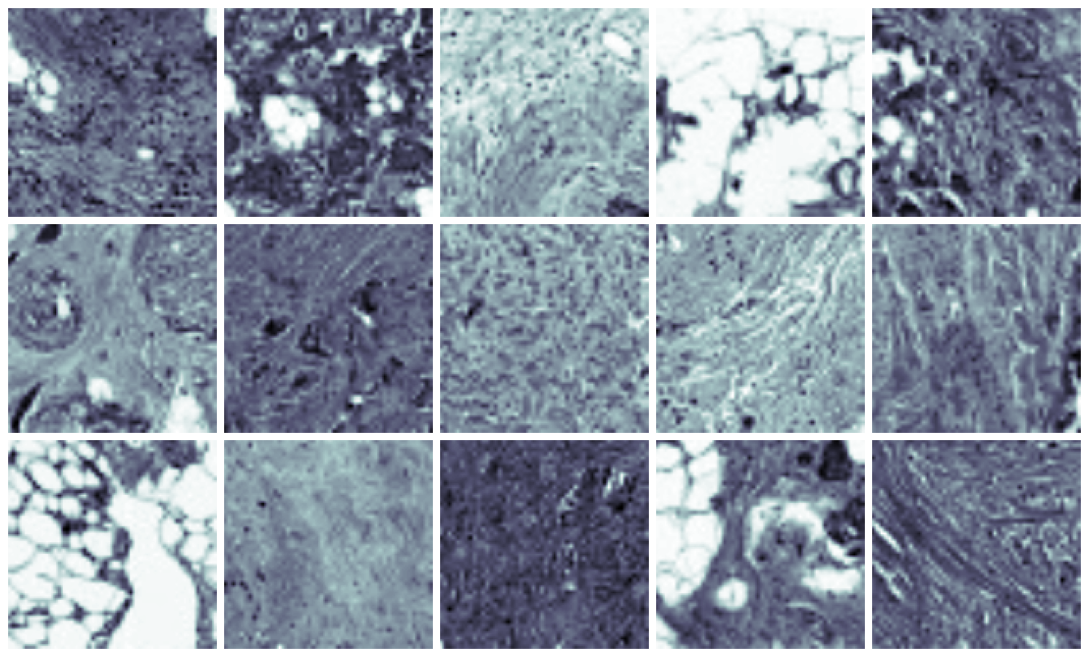

In [33]:
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(images[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])

# Callback

In [34]:
#os.mkdir('Model')


In [35]:
#os.mkdir('History')
def get_callbacks():
    
#    filepath = './Model/best_model_multiclass_128.hdf5'
    filepath = 'best_model_multiclass_128.h5'
    #callback1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    callback1 = ModelCheckpoint(filepath, verbose=1, save_best_only=True, mode='min')
    callback2 = MyLogger(val_generator, 
                         y_test = np.argmax(test_label, axis = 1),
                         class_labels = ['idc-', 'idc+'])
    
    callback3 = CSVLogger('./History/Multiclass_Log_128.csv')

    return [callback1 ,callback2, callback3]

# Training

In [36]:
model = Network128(input_shape = (128, 128, 3), nb_class = 2, depth = 5)
model.summary() 

2022-05-16 21:56:02.133373: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 1216        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 32)   4640        batch_normalization[0][0]        
______________________________________________________________________________________________

# Plotting Model

In [37]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

2022-05-16 21:56:17.443647: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/70
87/87 [==============================] - 455s 5s/step - loss: 0.6285 - accuracy: 0.6994 - val_loss: 0.8808 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.88084, saving model to best_model_multiclass_128.h5
Predicting test data
12/12 [==============================] - 23s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:22.875617


---------------------
| Balanced Accuracy  |
---------------------

    0.5


---------------------
|      Accuracy      |
---------------------

    0.5


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.50      1.00      0.67        90

    accuracy                           0.50       180
   macro avg       0.25      0.50      0.33       180
weighted avg       0.25      0.50      0.33       180

--------------------
| Confusion Matrix |
--------------------

 [[ 0 90]

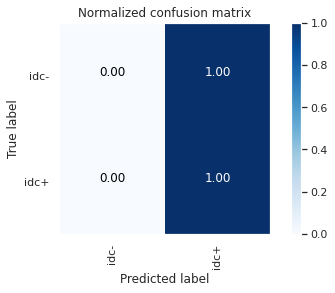

Epoch 2/70
87/87 [==============================] - 430s 5s/step - loss: 0.5644 - accuracy: 0.7478 - val_loss: 0.7076 - val_accuracy: 0.5000

Epoch 00002: val_loss improved from 0.88084 to 0.70759, saving model to best_model_multiclass_128.h5
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.011170


---------------------
| Balanced Accuracy  |
---------------------

    0.5


---------------------
|      Accuracy      |
---------------------

    0.5


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        90
           1       0.00      0.00      0.00        90

    accuracy                           0.50       180
   macro avg       0.25      0.50      0.33       180
weighted avg       0.25      0.50      0.33       180

--------------------
| Confusion Matrix |
--------------------

 [[90

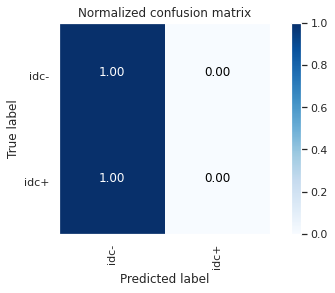

Epoch 3/70
87/87 [==============================] - 433s 5s/step - loss: 0.5380 - accuracy: 0.7478 - val_loss: 1.5578 - val_accuracy: 0.5000

Epoch 00003: val_loss did not improve from 0.70759
Predicting test data
12/12 [==============================] - 18s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.815520


---------------------
| Balanced Accuracy  |
---------------------

    0.5


---------------------
|      Accuracy      |
---------------------

    0.5


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        90
           1       0.00      0.00      0.00        90

    accuracy                           0.50       180
   macro avg       0.25      0.50      0.33       180
weighted avg       0.25      0.50      0.33       180

--------------------
| Confusion Matrix |
--------------------

 [[90  0]
 [90  0]]


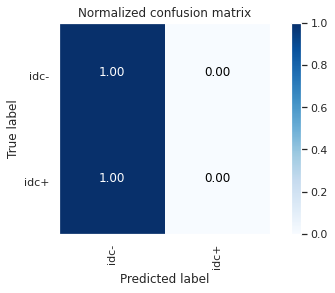

Epoch 4/70
87/87 [==============================] - 429s 5s/step - loss: 0.5045 - accuracy: 0.7587 - val_loss: 0.9934 - val_accuracy: 0.5000

Epoch 00004: val_loss did not improve from 0.70759
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.730627


---------------------
| Balanced Accuracy  |
---------------------

    0.5


---------------------
|      Accuracy      |
---------------------

    0.5


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        90
           1       0.00      0.00      0.00        90

    accuracy                           0.50       180
   macro avg       0.25      0.50      0.33       180
weighted avg       0.25      0.50      0.33       180

--------------------
| Confusion Matrix |
--------------------

 [[90  0]
 [90  0]]


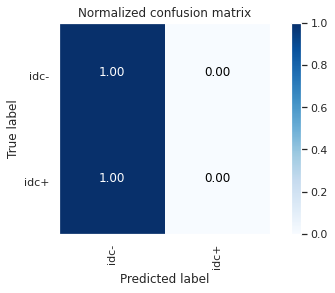

Epoch 5/70
87/87 [==============================] - 425s 5s/step - loss: 0.4973 - accuracy: 0.7731 - val_loss: 0.7611 - val_accuracy: 0.5000

Epoch 00005: val_loss did not improve from 0.70759
Predicting test data
12/12 [==============================] - 18s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.594643


---------------------
| Balanced Accuracy  |
---------------------

    0.5


---------------------
|      Accuracy      |
---------------------

    0.5


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        90
           1       0.00      0.00      0.00        90

    accuracy                           0.50       180
   macro avg       0.25      0.50      0.33       180
weighted avg       0.25      0.50      0.33       180

--------------------
| Confusion Matrix |
--------------------

 [[90  0]
 [90  0]]


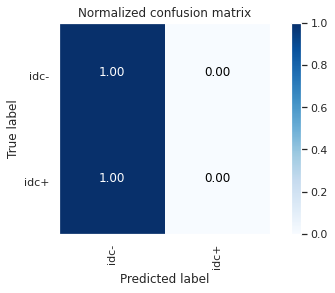

Epoch 6/70
87/87 [==============================] - 435s 5s/step - loss: 0.4829 - accuracy: 0.7796 - val_loss: 0.8052 - val_accuracy: 0.5455

Epoch 00006: val_loss did not improve from 0.70759
Predicting test data
12/12 [==============================] - 19s 2s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:18.766331


---------------------
| Balanced Accuracy  |
---------------------

    0.5444444444444444


---------------------
|      Accuracy      |
---------------------

    0.5444444444444444


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.52      0.94      0.67        90
           1       0.72      0.14      0.24        90

    accuracy                           0.54       180
   macro avg       0.62      0.54      0.46       180
weighted avg       0.62      0.54      0.46       180

--------------------
| Confusion Matrix |
--------------------

 [[85  5]
 [77 13]]


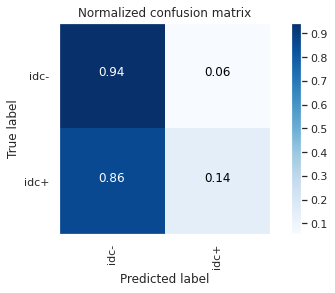

Epoch 7/70
87/87 [==============================] - 426s 5s/step - loss: 0.4767 - accuracy: 0.7854 - val_loss: 0.9645 - val_accuracy: 0.5170

Epoch 00007: val_loss did not improve from 0.70759
Predicting test data
12/12 [==============================] - 18s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.906868


---------------------
| Balanced Accuracy  |
---------------------

    0.5166666666666667


---------------------
|      Accuracy      |
---------------------

    0.5166666666666667


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.51      1.00      0.67        90
           1       1.00      0.03      0.06        90

    accuracy                           0.52       180
   macro avg       0.75      0.52      0.37       180
weighted avg       0.75      0.52      0.37       180

--------------------
| Confusion Matrix |
--------------------

 [[90  0]
 [87  3]]


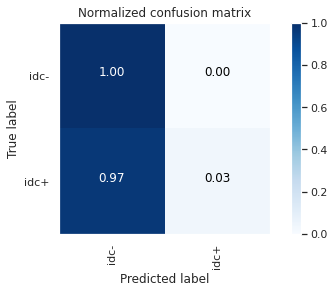

Epoch 8/70
87/87 [==============================] - 443s 5s/step - loss: 0.4718 - accuracy: 0.7955 - val_loss: 0.4386 - val_accuracy: 0.8295

Epoch 00008: val_loss improved from 0.70759 to 0.43858, saving model to best_model_multiclass_128.h5
Predicting test data
12/12 [==============================] - 18s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:20.551982


---------------------
| Balanced Accuracy  |
---------------------

    0.8333333333333333


---------------------
|      Accuracy      |
---------------------

    0.8333333333333334


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        90
           1       0.85      0.81      0.83        90

    accuracy                           0.83       180
   macro avg       0.83      0.83      0.83       180
weighted avg       0.83      0.83      0.83       180

--------------------
| Confusion Matrix

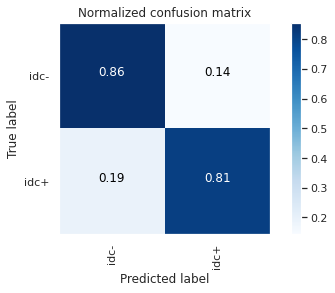

Epoch 9/70
87/87 [==============================] - 435s 5s/step - loss: 0.4651 - accuracy: 0.7934 - val_loss: 0.5034 - val_accuracy: 0.8125

Epoch 00009: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 18s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:18.169882


---------------------
| Balanced Accuracy  |
---------------------

    0.8166666666666667


---------------------
|      Accuracy      |
---------------------

    0.8166666666666667


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        90
           1       0.83      0.80      0.81        90

    accuracy                           0.82       180
   macro avg       0.82      0.82      0.82       180
weighted avg       0.82      0.82      0.82       180

--------------------
| Confusion Matrix |
--------------------

 [[75 15]
 [18 72]]


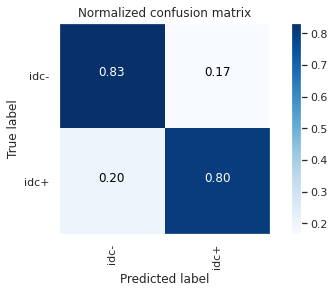

Epoch 10/70
87/87 [==============================] - 434s 5s/step - loss: 0.4511 - accuracy: 0.7970 - val_loss: 0.4412 - val_accuracy: 0.8011

Epoch 00010: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.233656


---------------------
| Balanced Accuracy  |
---------------------

    0.8055555555555556


---------------------
|      Accuracy      |
---------------------

    0.8055555555555556


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        90
           1       0.82      0.78      0.80        90

    accuracy                           0.81       180
   macro avg       0.81      0.81      0.81       180
weighted avg       0.81      0.81      0.81       180

--------------------
| Confusion Matrix |
--------------------

 [[75 15]
 [20 70]]


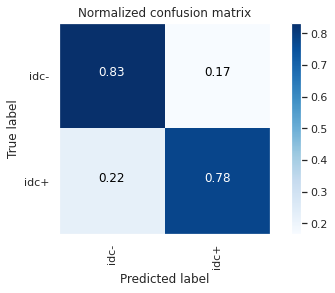

Epoch 11/70
87/87 [==============================] - 435s 5s/step - loss: 0.4330 - accuracy: 0.8064 - val_loss: 1.2058 - val_accuracy: 0.6080

Epoch 00011: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.472401


---------------------
| Balanced Accuracy  |
---------------------

    0.6111111111111112


---------------------
|      Accuracy      |
---------------------

    0.6111111111111112


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.56      0.97      0.71        90
           1       0.88      0.26      0.40        90

    accuracy                           0.61       180
   macro avg       0.72      0.61      0.55       180
weighted avg       0.72      0.61      0.55       180

--------------------
| Confusion Matrix |
--------------------

 [[87  3]
 [67 23]]


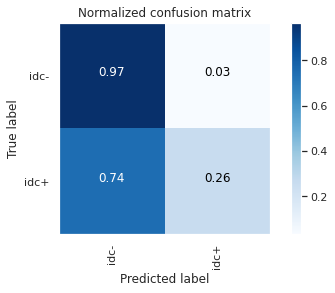

Epoch 12/70
87/87 [==============================] - 437s 5s/step - loss: 0.4410 - accuracy: 0.8092 - val_loss: 0.7497 - val_accuracy: 0.7500

Epoch 00012: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 18s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.829789


---------------------
| Balanced Accuracy  |
---------------------

    0.75


---------------------
|      Accuracy      |
---------------------

    0.75


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.71      0.84      0.77        90
           1       0.81      0.66      0.72        90

    accuracy                           0.75       180
   macro avg       0.76      0.75      0.75       180
weighted avg       0.76      0.75      0.75       180

--------------------
| Confusion Matrix |
--------------------

 [[76 14]
 [31 59]]


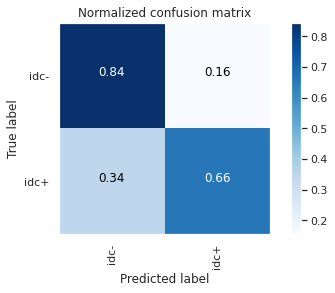

Epoch 13/70
87/87 [==============================] - 436s 5s/step - loss: 0.4644 - accuracy: 0.7890 - val_loss: 0.5676 - val_accuracy: 0.7727

Epoch 00013: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 18s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.588814


---------------------
| Balanced Accuracy  |
---------------------

    0.7777777777777777


---------------------
|      Accuracy      |
---------------------

    0.7777777777777778


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.74      0.86      0.79        90
           1       0.83      0.70      0.76        90

    accuracy                           0.78       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.78      0.78      0.78       180

--------------------
| Confusion Matrix |
--------------------

 [[77 13]
 [27 63]]


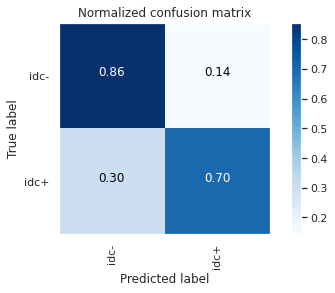

Epoch 14/70
87/87 [==============================] - 435s 5s/step - loss: 0.4488 - accuracy: 0.8049 - val_loss: 0.4901 - val_accuracy: 0.7955

Epoch 00014: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 18s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.705647


---------------------
| Balanced Accuracy  |
---------------------

    0.8


---------------------
|      Accuracy      |
---------------------

    0.8


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        90
           1       0.79      0.81      0.80        90

    accuracy                           0.80       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.80      0.80      0.80       180

--------------------
| Confusion Matrix |
--------------------

 [[71 19]
 [17 73]]


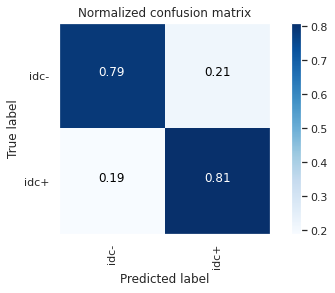

Epoch 15/70
87/87 [==============================] - 436s 5s/step - loss: 0.4490 - accuracy: 0.8035 - val_loss: 0.5213 - val_accuracy: 0.7898

Epoch 00015: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 18s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.892844


---------------------
| Balanced Accuracy  |
---------------------

    0.7944444444444445


---------------------
|      Accuracy      |
---------------------

    0.7944444444444444


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        90
           1       0.82      0.76      0.79        90

    accuracy                           0.79       180
   macro avg       0.80      0.79      0.79       180
weighted avg       0.80      0.79      0.79       180

--------------------
| Confusion Matrix |
--------------------

 [[75 15]
 [22 68]]


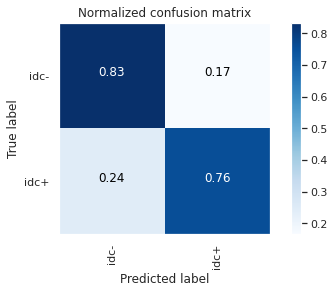

Epoch 16/70
87/87 [==============================] - 442s 5s/step - loss: 0.4301 - accuracy: 0.8078 - val_loss: 0.5171 - val_accuracy: 0.7841

Epoch 00016: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 18s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:18.043344


---------------------
| Balanced Accuracy  |
---------------------

    0.7833333333333333


---------------------
|      Accuracy      |
---------------------

    0.7833333333333333


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        90
           1       0.83      0.71      0.77        90

    accuracy                           0.78       180
   macro avg       0.79      0.78      0.78       180
weighted avg       0.79      0.78      0.78       180

--------------------
| Confusion Matrix |
--------------------

 [[77 13]
 [26 64]]


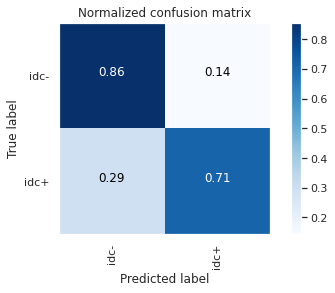

Epoch 17/70
87/87 [==============================] - 443s 5s/step - loss: 0.4219 - accuracy: 0.8121 - val_loss: 0.4717 - val_accuracy: 0.8068

Epoch 00017: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 18s 2s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:18.476705


---------------------
| Balanced Accuracy  |
---------------------

    0.8111111111111111


---------------------
|      Accuracy      |
---------------------

    0.8111111111111111


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        90
           1       0.80      0.83      0.82        90

    accuracy                           0.81       180
   macro avg       0.81      0.81      0.81       180
weighted avg       0.81      0.81      0.81       180

--------------------
| Confusion Matrix |
--------------------

 [[71 19]
 [15 75]]


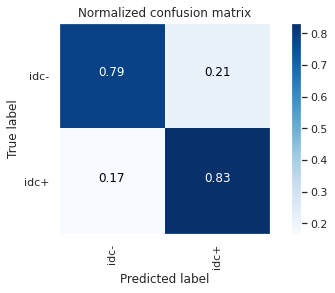

Epoch 18/70
87/87 [==============================] - 429s 5s/step - loss: 0.4151 - accuracy: 0.8158 - val_loss: 0.8846 - val_accuracy: 0.6080

Epoch 00018: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 18s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.664083


---------------------
| Balanced Accuracy  |
---------------------

    0.6055555555555555


---------------------
|      Accuracy      |
---------------------

    0.6055555555555555


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.83      0.27      0.40        90
           1       0.56      0.94      0.71        90

    accuracy                           0.61       180
   macro avg       0.70      0.61      0.55       180
weighted avg       0.70      0.61      0.55       180

--------------------
| Confusion Matrix |
--------------------

 [[24 66]
 [ 5 85]]


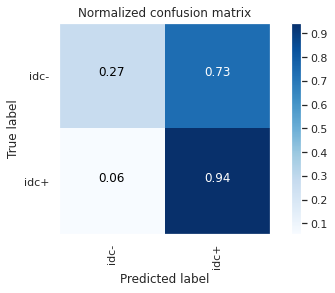

Epoch 19/70
87/87 [==============================] - 429s 5s/step - loss: 0.4411 - accuracy: 0.8129 - val_loss: 0.6143 - val_accuracy: 0.7159

Epoch 00019: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 18s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.726590


---------------------
| Balanced Accuracy  |
---------------------

    0.7166666666666666


---------------------
|      Accuracy      |
---------------------

    0.7166666666666667


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.71      0.73      0.72        90
           1       0.72      0.70      0.71        90

    accuracy                           0.72       180
   macro avg       0.72      0.72      0.72       180
weighted avg       0.72      0.72      0.72       180

--------------------
| Confusion Matrix |
--------------------

 [[66 24]
 [27 63]]


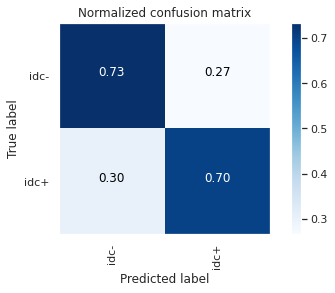

Epoch 20/70
87/87 [==============================] - 431s 5s/step - loss: 0.4356 - accuracy: 0.8042 - val_loss: 0.6955 - val_accuracy: 0.6023

Epoch 00020: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.443386


---------------------
| Balanced Accuracy  |
---------------------

    0.6


---------------------
|      Accuracy      |
---------------------

    0.6


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.80      0.27      0.40        90
           1       0.56      0.93      0.70        90

    accuracy                           0.60       180
   macro avg       0.68      0.60      0.55       180
weighted avg       0.68      0.60      0.55       180

--------------------
| Confusion Matrix |
--------------------

 [[24 66]
 [ 6 84]]


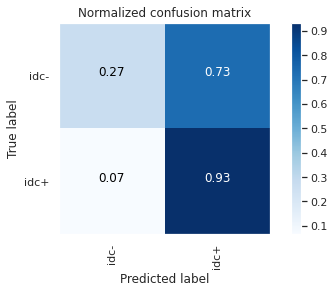

Epoch 21/70
87/87 [==============================] - 429s 5s/step - loss: 0.3959 - accuracy: 0.8158 - val_loss: 0.4412 - val_accuracy: 0.7955

Epoch 00021: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.321304


---------------------
| Balanced Accuracy  |
---------------------

    0.7944444444444444


---------------------
|      Accuracy      |
---------------------

    0.7944444444444444


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        90
           1       0.84      0.73      0.78        90

    accuracy                           0.79       180
   macro avg       0.80      0.79      0.79       180
weighted avg       0.80      0.79      0.79       180

--------------------
| Confusion Matrix |
--------------------

 [[77 13]
 [24 66]]


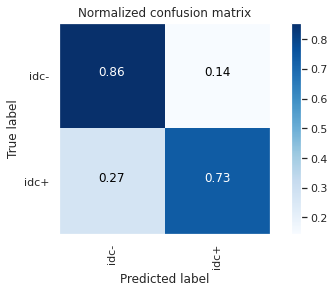

Epoch 22/70
87/87 [==============================] - 436s 5s/step - loss: 0.4065 - accuracy: 0.8100 - val_loss: 0.4399 - val_accuracy: 0.7841

Epoch 00022: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 18s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.636923


---------------------
| Balanced Accuracy  |
---------------------

    0.788888888888889


---------------------
|      Accuracy      |
---------------------

    0.7888888888888889


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        90
           1       0.82      0.74      0.78        90

    accuracy                           0.79       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.79      0.79      0.79       180

--------------------
| Confusion Matrix |
--------------------

 [[75 15]
 [23 67]]


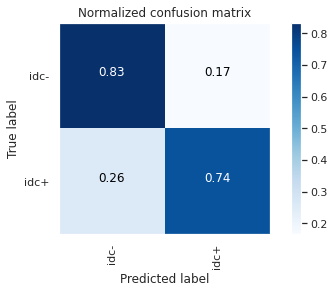

Epoch 23/70
87/87 [==============================] - 437s 5s/step - loss: 0.3987 - accuracy: 0.8215 - val_loss: 2.2617 - val_accuracy: 0.5170

Epoch 00023: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.437595


---------------------
| Balanced Accuracy  |
---------------------

    0.5166666666666667


---------------------
|      Accuracy      |
---------------------

    0.5166666666666667


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.51      1.00      0.67        90
           1       1.00      0.03      0.06        90

    accuracy                           0.52       180
   macro avg       0.75      0.52      0.37       180
weighted avg       0.75      0.52      0.37       180

--------------------
| Confusion Matrix |
--------------------

 [[90  0]
 [87  3]]


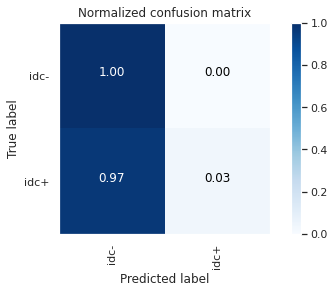

Epoch 24/70
87/87 [==============================] - 431s 5s/step - loss: 0.4007 - accuracy: 0.8129 - val_loss: 0.5779 - val_accuracy: 0.7784

Epoch 00024: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 18s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.553014


---------------------
| Balanced Accuracy  |
---------------------

    0.7777777777777777


---------------------
|      Accuracy      |
---------------------

    0.7777777777777778


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.74      0.86      0.79        90
           1       0.83      0.70      0.76        90

    accuracy                           0.78       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.78      0.78      0.78       180

--------------------
| Confusion Matrix |
--------------------

 [[77 13]
 [27 63]]


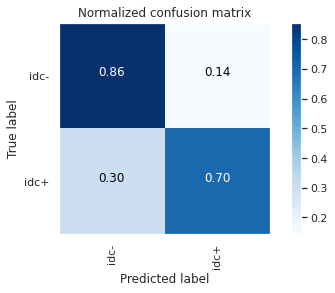

Epoch 25/70
87/87 [==============================] - 437s 5s/step - loss: 0.3768 - accuracy: 0.8353 - val_loss: 0.9308 - val_accuracy: 0.6932

Epoch 00025: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 18s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.949017


---------------------
| Balanced Accuracy  |
---------------------

    0.6944444444444444


---------------------
|      Accuracy      |
---------------------

    0.6944444444444444


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.64      0.91      0.75        90
           1       0.84      0.48      0.61        90

    accuracy                           0.69       180
   macro avg       0.74      0.69      0.68       180
weighted avg       0.74      0.69      0.68       180

--------------------
| Confusion Matrix |
--------------------

 [[82  8]
 [47 43]]


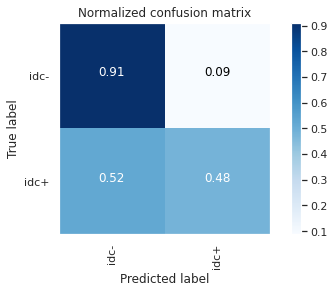

Epoch 26/70
87/87 [==============================] - 431s 5s/step - loss: 0.3814 - accuracy: 0.8396 - val_loss: 0.5915 - val_accuracy: 0.6989

Epoch 00026: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.197362


---------------------
| Balanced Accuracy  |
---------------------

    0.7055555555555555


---------------------
|      Accuracy      |
---------------------

    0.7055555555555556


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.74      0.63      0.68        90
           1       0.68      0.78      0.73        90

    accuracy                           0.71       180
   macro avg       0.71      0.71      0.70       180
weighted avg       0.71      0.71      0.70       180

--------------------
| Confusion Matrix |
--------------------

 [[57 33]
 [20 70]]


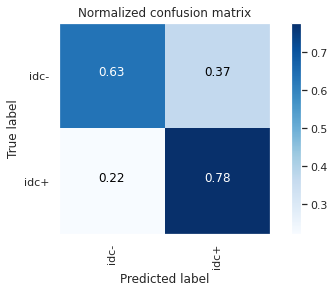

Epoch 27/70
87/87 [==============================] - 426s 5s/step - loss: 0.3717 - accuracy: 0.8360 - val_loss: 0.6991 - val_accuracy: 0.6932

Epoch 00027: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.282342


---------------------
| Balanced Accuracy  |
---------------------

    0.6944444444444444


---------------------
|      Accuracy      |
---------------------

    0.6944444444444444


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.63      0.93      0.75        90
           1       0.87      0.46      0.60        90

    accuracy                           0.69       180
   macro avg       0.75      0.69      0.68       180
weighted avg       0.75      0.69      0.68       180

--------------------
| Confusion Matrix |
--------------------

 [[84  6]
 [49 41]]


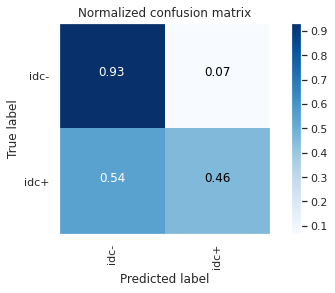

Epoch 28/70
87/87 [==============================] - 419s 5s/step - loss: 0.3699 - accuracy: 0.8410 - val_loss: 1.5248 - val_accuracy: 0.6761

Epoch 00028: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 18s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:20.536882


---------------------
| Balanced Accuracy  |
---------------------

    0.6777777777777778


---------------------
|      Accuracy      |
---------------------

    0.6777777777777778


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.61      0.96      0.75        90
           1       0.90      0.40      0.55        90

    accuracy                           0.68       180
   macro avg       0.76      0.68      0.65       180
weighted avg       0.76      0.68      0.65       180

--------------------
| Confusion Matrix |
--------------------

 [[86  4]
 [54 36]]


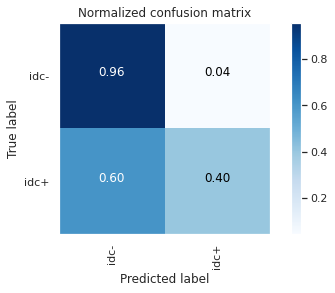

Epoch 29/70
87/87 [==============================] - 418s 5s/step - loss: 0.3583 - accuracy: 0.8475 - val_loss: 0.8529 - val_accuracy: 0.7216

Epoch 00029: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:16.808665


---------------------
| Balanced Accuracy  |
---------------------

    0.7222222222222222


---------------------
|      Accuracy      |
---------------------

    0.7222222222222222


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.65      0.94      0.77        90
           1       0.90      0.50      0.64        90

    accuracy                           0.72       180
   macro avg       0.78      0.72      0.71       180
weighted avg       0.78      0.72      0.71       180

--------------------
| Confusion Matrix |
--------------------

 [[85  5]
 [45 45]]


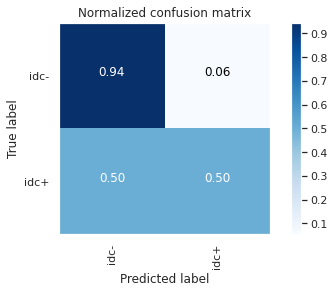

Epoch 30/70
87/87 [==============================] - 424s 5s/step - loss: 0.3309 - accuracy: 0.8613 - val_loss: 0.7998 - val_accuracy: 0.7102

Epoch 00030: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 18s 2s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:18.295378


---------------------
| Balanced Accuracy  |
---------------------

    0.711111111111111


---------------------
|      Accuracy      |
---------------------

    0.7111111111111111


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.85      0.51      0.64        90
           1       0.65      0.91      0.76        90

    accuracy                           0.71       180
   macro avg       0.75      0.71      0.70       180
weighted avg       0.75      0.71      0.70       180

--------------------
| Confusion Matrix |
--------------------

 [[46 44]
 [ 8 82]]


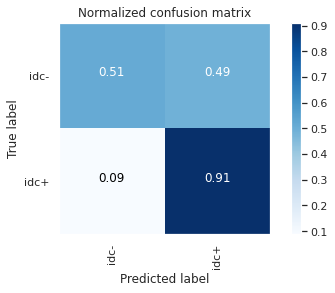

Epoch 31/70
87/87 [==============================] - 437s 5s/step - loss: 0.3460 - accuracy: 0.8555 - val_loss: 0.5298 - val_accuracy: 0.7557

Epoch 00031: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:16.899245


---------------------
| Balanced Accuracy  |
---------------------

    0.7611111111111111


---------------------
|      Accuracy      |
---------------------

    0.7611111111111111


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.78      0.73      0.75        90
           1       0.75      0.79      0.77        90

    accuracy                           0.76       180
   macro avg       0.76      0.76      0.76       180
weighted avg       0.76      0.76      0.76       180

--------------------
| Confusion Matrix |
--------------------

 [[66 24]
 [19 71]]


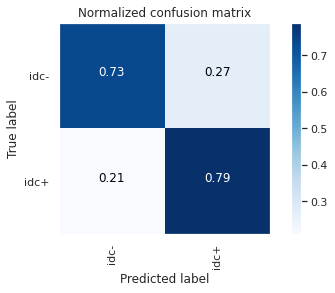

Epoch 32/70
87/87 [==============================] - 417s 5s/step - loss: 0.3031 - accuracy: 0.8721 - val_loss: 0.7109 - val_accuracy: 0.7727

Epoch 00032: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 16s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:16.102923


---------------------
| Balanced Accuracy  |
---------------------

    0.7777777777777778


---------------------
|      Accuracy      |
---------------------

    0.7777777777777778


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.73      0.88      0.80        90
           1       0.85      0.68      0.75        90

    accuracy                           0.78       180
   macro avg       0.79      0.78      0.78       180
weighted avg       0.79      0.78      0.78       180

--------------------
| Confusion Matrix |
--------------------

 [[79 11]
 [29 61]]


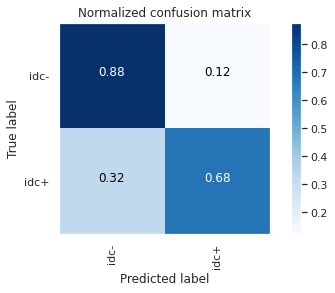

Epoch 33/70
87/87 [==============================] - 414s 5s/step - loss: 0.2859 - accuracy: 0.8851 - val_loss: 0.5639 - val_accuracy: 0.7500

Epoch 00033: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 18s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.875950


---------------------
| Balanced Accuracy  |
---------------------

    0.7555555555555555


---------------------
|      Accuracy      |
---------------------

    0.7555555555555555


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.77      0.72      0.75        90
           1       0.74      0.79      0.76        90

    accuracy                           0.76       180
   macro avg       0.76      0.76      0.76       180
weighted avg       0.76      0.76      0.76       180

--------------------
| Confusion Matrix |
--------------------

 [[65 25]
 [19 71]]


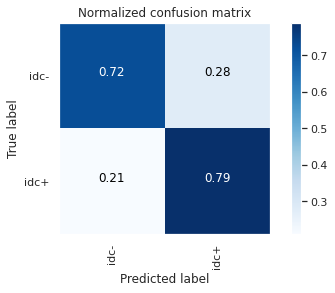

Epoch 34/70
87/87 [==============================] - 428s 5s/step - loss: 0.2935 - accuracy: 0.8728 - val_loss: 0.4604 - val_accuracy: 0.8068

Epoch 00034: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.254915


---------------------
| Balanced Accuracy  |
---------------------

    0.8111111111111111


---------------------
|      Accuracy      |
---------------------

    0.8111111111111111


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        90
           1       0.80      0.83      0.82        90

    accuracy                           0.81       180
   macro avg       0.81      0.81      0.81       180
weighted avg       0.81      0.81      0.81       180

--------------------
| Confusion Matrix |
--------------------

 [[71 19]
 [15 75]]


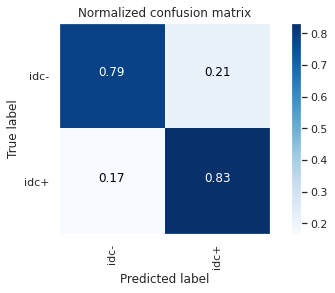

Epoch 35/70
87/87 [==============================] - 428s 5s/step - loss: 0.2711 - accuracy: 0.8895 - val_loss: 0.7009 - val_accuracy: 0.7670

Epoch 00035: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 18s 2s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:18.176256


---------------------
| Balanced Accuracy  |
---------------------

    0.7666666666666666


---------------------
|      Accuracy      |
---------------------

    0.7666666666666667


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.71      0.89      0.79        90
           1       0.85      0.64      0.73        90

    accuracy                           0.77       180
   macro avg       0.78      0.77      0.76       180
weighted avg       0.78      0.77      0.76       180

--------------------
| Confusion Matrix |
--------------------

 [[80 10]
 [32 58]]


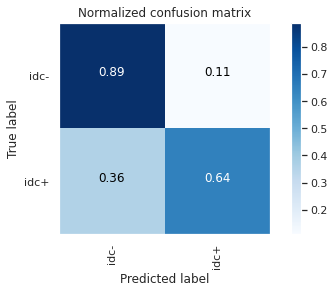

Epoch 36/70
87/87 [==============================] - 428s 5s/step - loss: 0.2614 - accuracy: 0.8952 - val_loss: 0.7227 - val_accuracy: 0.7841

Epoch 00036: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 16s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.032243


---------------------
| Balanced Accuracy  |
---------------------

    0.7833333333333333


---------------------
|      Accuracy      |
---------------------

    0.7833333333333333


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.73      0.90      0.81        90
           1       0.87      0.67      0.75        90

    accuracy                           0.78       180
   macro avg       0.80      0.78      0.78       180
weighted avg       0.80      0.78      0.78       180

--------------------
| Confusion Matrix |
--------------------

 [[81  9]
 [30 60]]


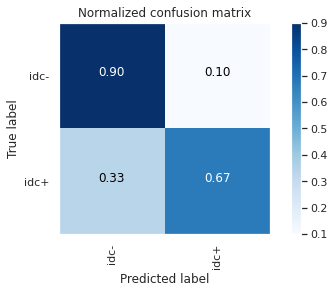

Epoch 37/70
87/87 [==============================] - 414s 5s/step - loss: 0.2501 - accuracy: 0.9003 - val_loss: 0.6219 - val_accuracy: 0.7784

Epoch 00037: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.364915


---------------------
| Balanced Accuracy  |
---------------------

    0.7833333333333333


---------------------
|      Accuracy      |
---------------------

    0.7833333333333333


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.87      0.67      0.75        90
           1       0.73      0.90      0.81        90

    accuracy                           0.78       180
   macro avg       0.80      0.78      0.78       180
weighted avg       0.80      0.78      0.78       180

--------------------
| Confusion Matrix |
--------------------

 [[60 30]
 [ 9 81]]


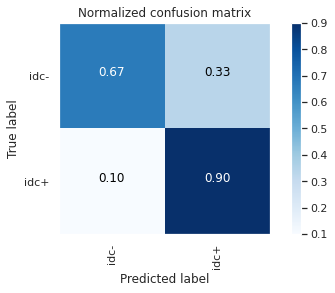

Epoch 38/70
87/87 [==============================] - 418s 5s/step - loss: 0.2387 - accuracy: 0.9017 - val_loss: 0.7382 - val_accuracy: 0.6932

Epoch 00038: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.000940


---------------------
| Balanced Accuracy  |
---------------------

    0.7


---------------------
|      Accuracy      |
---------------------

    0.7


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.85      0.49      0.62        90
           1       0.64      0.91      0.75        90

    accuracy                           0.70       180
   macro avg       0.74      0.70      0.69       180
weighted avg       0.74      0.70      0.69       180

--------------------
| Confusion Matrix |
--------------------

 [[44 46]
 [ 8 82]]


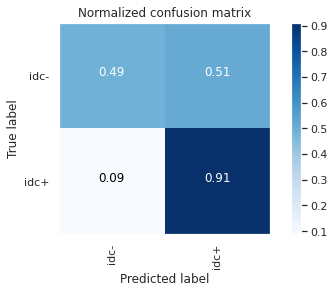

Epoch 39/70
87/87 [==============================] - 417s 5s/step - loss: 0.2193 - accuracy: 0.9184 - val_loss: 0.9374 - val_accuracy: 0.7500

Epoch 00039: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:20.545807


---------------------
| Balanced Accuracy  |
---------------------

    0.7555555555555555


---------------------
|      Accuracy      |
---------------------

    0.7555555555555555


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.84      0.63      0.72        90
           1       0.71      0.88      0.78        90

    accuracy                           0.76       180
   macro avg       0.77      0.76      0.75       180
weighted avg       0.77      0.76      0.75       180

--------------------
| Confusion Matrix |
--------------------

 [[57 33]
 [11 79]]


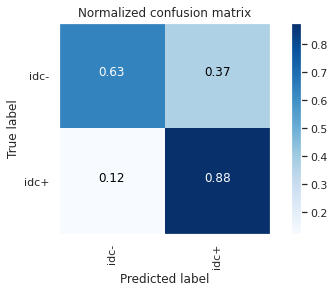

Epoch 40/70
87/87 [==============================] - 417s 5s/step - loss: 0.2326 - accuracy: 0.9053 - val_loss: 1.0237 - val_accuracy: 0.7727

Epoch 00040: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.443053


---------------------
| Balanced Accuracy  |
---------------------

    0.7777777777777778


---------------------
|      Accuracy      |
---------------------

    0.7777777777777778


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.77      0.80      0.78        90
           1       0.79      0.76      0.77        90

    accuracy                           0.78       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.78      0.78      0.78       180

--------------------
| Confusion Matrix |
--------------------

 [[72 18]
 [22 68]]


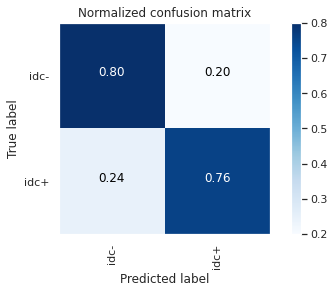

Epoch 41/70
87/87 [==============================] - 414s 5s/step - loss: 0.2206 - accuracy: 0.9147 - val_loss: 0.6148 - val_accuracy: 0.7841

Epoch 00041: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.270759


---------------------
| Balanced Accuracy  |
---------------------

    0.7888888888888889


---------------------
|      Accuracy      |
---------------------

    0.7888888888888889


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.81      0.76      0.78        90
           1       0.77      0.82      0.80        90

    accuracy                           0.79       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.79      0.79      0.79       180

--------------------
| Confusion Matrix |
--------------------

 [[68 22]
 [16 74]]


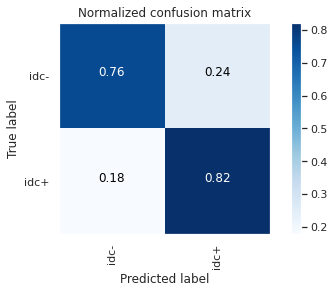

Epoch 42/70
87/87 [==============================] - 411s 5s/step - loss: 0.2151 - accuracy: 0.9220 - val_loss: 0.6902 - val_accuracy: 0.7330

Epoch 00042: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.046180


---------------------
| Balanced Accuracy  |
---------------------

    0.7277777777777779


---------------------
|      Accuracy      |
---------------------

    0.7277777777777777


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.79      0.62      0.70        90
           1       0.69      0.83      0.75        90

    accuracy                           0.73       180
   macro avg       0.74      0.73      0.72       180
weighted avg       0.74      0.73      0.72       180

--------------------
| Confusion Matrix |
--------------------

 [[56 34]
 [15 75]]


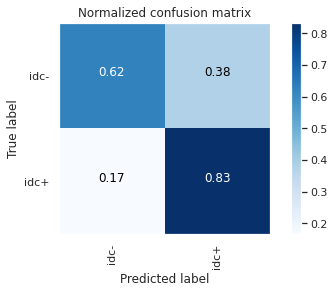

Epoch 43/70
87/87 [==============================] - 412s 5s/step - loss: 0.1590 - accuracy: 0.9400 - val_loss: 1.5094 - val_accuracy: 0.7102

Epoch 00043: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.293325


---------------------
| Balanced Accuracy  |
---------------------

    0.7111111111111111


---------------------
|      Accuracy      |
---------------------

    0.7111111111111111


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.65      0.92      0.76        90
           1       0.87      0.50      0.63        90

    accuracy                           0.71       180
   macro avg       0.76      0.71      0.70       180
weighted avg       0.76      0.71      0.70       180

--------------------
| Confusion Matrix |
--------------------

 [[83  7]
 [45 45]]


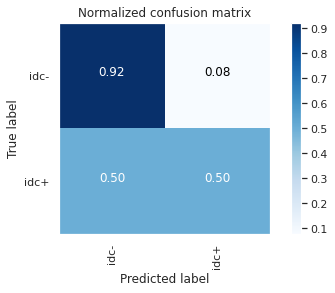

Epoch 44/70
87/87 [==============================] - 415s 5s/step - loss: 0.1775 - accuracy: 0.9299 - val_loss: 0.8700 - val_accuracy: 0.7670

Epoch 00044: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.382725


---------------------
| Balanced Accuracy  |
---------------------

    0.7666666666666666


---------------------
|      Accuracy      |
---------------------

    0.7666666666666667


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        90
           1       0.73      0.84      0.78        90

    accuracy                           0.77       180
   macro avg       0.77      0.77      0.77       180
weighted avg       0.77      0.77      0.77       180

--------------------
| Confusion Matrix |
--------------------

 [[62 28]
 [14 76]]


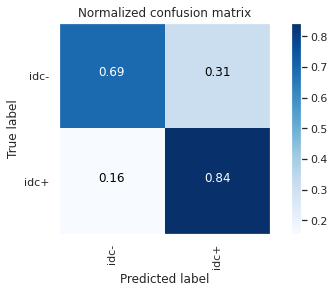

Epoch 45/70
87/87 [==============================] - 429s 5s/step - loss: 0.2232 - accuracy: 0.9133 - val_loss: 0.7920 - val_accuracy: 0.7216

Epoch 00045: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 18s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.686599


---------------------
| Balanced Accuracy  |
---------------------

    0.7166666666666667


---------------------
|      Accuracy      |
---------------------

    0.7166666666666667


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.79      0.59      0.68        90
           1       0.67      0.84      0.75        90

    accuracy                           0.72       180
   macro avg       0.73      0.72      0.71       180
weighted avg       0.73      0.72      0.71       180

--------------------
| Confusion Matrix |
--------------------

 [[53 37]
 [14 76]]


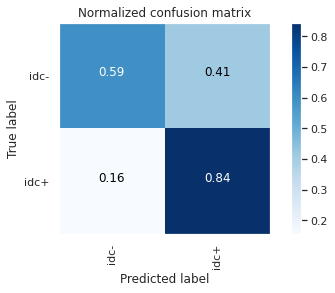

Epoch 46/70
87/87 [==============================] - 416s 5s/step - loss: 0.1792 - accuracy: 0.9314 - val_loss: 1.4174 - val_accuracy: 0.6989

Epoch 00046: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.156224


---------------------
| Balanced Accuracy  |
---------------------

    0.7


---------------------
|      Accuracy      |
---------------------

    0.7


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.64      0.90      0.75        90
           1       0.83      0.50      0.62        90

    accuracy                           0.70       180
   macro avg       0.74      0.70      0.69       180
weighted avg       0.74      0.70      0.69       180

--------------------
| Confusion Matrix |
--------------------

 [[81  9]
 [45 45]]


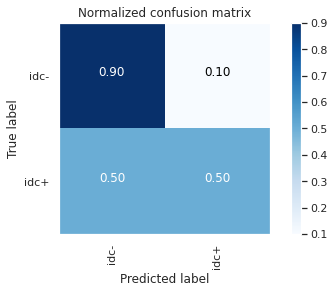

Epoch 47/70
87/87 [==============================] - 410s 5s/step - loss: 0.2052 - accuracy: 0.9198 - val_loss: 0.9574 - val_accuracy: 0.7330

Epoch 00047: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 16s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:16.475396


---------------------
| Balanced Accuracy  |
---------------------

    0.7277777777777779


---------------------
|      Accuracy      |
---------------------

    0.7277777777777777


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.67      0.90      0.77        90
           1       0.85      0.56      0.67        90

    accuracy                           0.73       180
   macro avg       0.76      0.73      0.72       180
weighted avg       0.76      0.73      0.72       180

--------------------
| Confusion Matrix |
--------------------

 [[81  9]
 [40 50]]


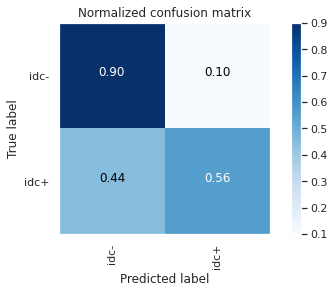

Epoch 48/70
87/87 [==============================] - 407s 5s/step - loss: 0.0967 - accuracy: 0.9639 - val_loss: 0.9642 - val_accuracy: 0.7670

Epoch 00048: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:16.953069


---------------------
| Balanced Accuracy  |
---------------------

    0.7722222222222221


---------------------
|      Accuracy      |
---------------------

    0.7722222222222223


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.80      0.72      0.76        90
           1       0.75      0.82      0.78        90

    accuracy                           0.77       180
   macro avg       0.77      0.77      0.77       180
weighted avg       0.77      0.77      0.77       180

--------------------
| Confusion Matrix |
--------------------

 [[65 25]
 [16 74]]


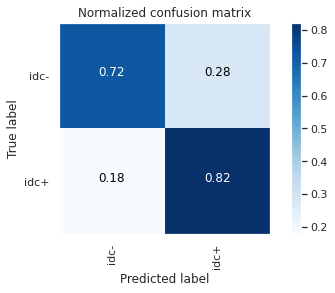

Epoch 49/70
87/87 [==============================] - 408s 5s/step - loss: 0.2113 - accuracy: 0.9140 - val_loss: 0.8926 - val_accuracy: 0.7670

Epoch 00049: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.331453


---------------------
| Balanced Accuracy  |
---------------------

    0.7666666666666666


---------------------
|      Accuracy      |
---------------------

    0.7666666666666667


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.71      0.89      0.79        90
           1       0.85      0.64      0.73        90

    accuracy                           0.77       180
   macro avg       0.78      0.77      0.76       180
weighted avg       0.78      0.77      0.76       180

--------------------
| Confusion Matrix |
--------------------

 [[80 10]
 [32 58]]


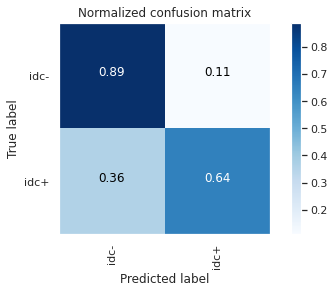

Epoch 50/70
87/87 [==============================] - 408s 5s/step - loss: 0.1361 - accuracy: 0.9523 - val_loss: 0.9572 - val_accuracy: 0.7841

Epoch 00050: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:16.554562


---------------------
| Balanced Accuracy  |
---------------------

    0.7833333333333334


---------------------
|      Accuracy      |
---------------------

    0.7833333333333333


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.77      0.80      0.79        90
           1       0.79      0.77      0.78        90

    accuracy                           0.78       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.78      0.78      0.78       180

--------------------
| Confusion Matrix |
--------------------

 [[72 18]
 [21 69]]


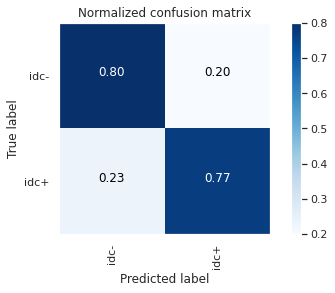

Epoch 51/70
87/87 [==============================] - 407s 5s/step - loss: 0.1513 - accuracy: 0.9415 - val_loss: 0.6884 - val_accuracy: 0.7500

Epoch 00051: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:16.676930


---------------------
| Balanced Accuracy  |
---------------------

    0.75


---------------------
|      Accuracy      |
---------------------

    0.75


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.84      0.62      0.71        90
           1       0.70      0.88      0.78        90

    accuracy                           0.75       180
   macro avg       0.77      0.75      0.75       180
weighted avg       0.77      0.75      0.75       180

--------------------
| Confusion Matrix |
--------------------

 [[56 34]
 [11 79]]


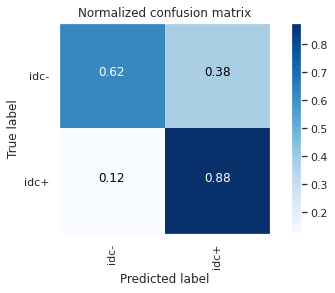

Epoch 52/70
87/87 [==============================] - 408s 5s/step - loss: 0.1373 - accuracy: 0.9523 - val_loss: 0.8678 - val_accuracy: 0.7614

Epoch 00052: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.235146


---------------------
| Balanced Accuracy  |
---------------------

    0.7555555555555555


---------------------
|      Accuracy      |
---------------------

    0.7555555555555555


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.78      0.71      0.74        90
           1       0.73      0.80      0.77        90

    accuracy                           0.76       180
   macro avg       0.76      0.76      0.76       180
weighted avg       0.76      0.76      0.76       180

--------------------
| Confusion Matrix |
--------------------

 [[64 26]
 [18 72]]


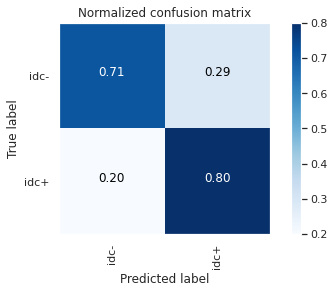

Epoch 53/70
87/87 [==============================] - 408s 5s/step - loss: 0.1435 - accuracy: 0.9451 - val_loss: 1.1624 - val_accuracy: 0.6818

Epoch 00053: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.094805


---------------------
| Balanced Accuracy  |
---------------------

    0.6833333333333333


---------------------
|      Accuracy      |
---------------------

    0.6833333333333333


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.78      0.51      0.62        90
           1       0.64      0.86      0.73        90

    accuracy                           0.68       180
   macro avg       0.71      0.68      0.67       180
weighted avg       0.71      0.68      0.67       180

--------------------
| Confusion Matrix |
--------------------

 [[46 44]
 [13 77]]


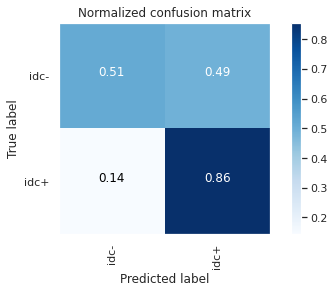

Epoch 54/70
87/87 [==============================] - 408s 5s/step - loss: 0.1326 - accuracy: 0.9501 - val_loss: 1.3952 - val_accuracy: 0.7102

Epoch 00054: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.222251


---------------------
| Balanced Accuracy  |
---------------------

    0.7111111111111111


---------------------
|      Accuracy      |
---------------------

    0.7111111111111111


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.65      0.90      0.76        90
           1       0.84      0.52      0.64        90

    accuracy                           0.71       180
   macro avg       0.75      0.71      0.70       180
weighted avg       0.75      0.71      0.70       180

--------------------
| Confusion Matrix |
--------------------

 [[81  9]
 [43 47]]


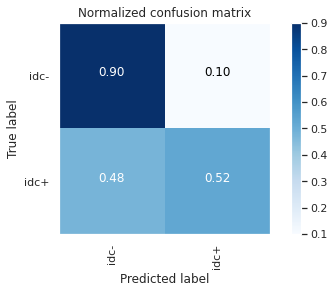

Epoch 55/70
87/87 [==============================] - 411s 5s/step - loss: 0.1605 - accuracy: 0.9393 - val_loss: 0.7328 - val_accuracy: 0.7670

Epoch 00055: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.455024


---------------------
| Balanced Accuracy  |
---------------------

    0.7722222222222223


---------------------
|      Accuracy      |
---------------------

    0.7722222222222223


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        90
           1       0.87      0.64      0.74        90

    accuracy                           0.77       180
   macro avg       0.79      0.77      0.77       180
weighted avg       0.79      0.77      0.77       180

--------------------
| Confusion Matrix |
--------------------

 [[81  9]
 [32 58]]


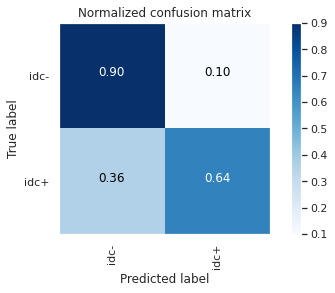

Epoch 56/70
87/87 [==============================] - 409s 5s/step - loss: 0.1136 - accuracy: 0.9552 - val_loss: 1.0884 - val_accuracy: 0.7500

Epoch 00056: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:16.588782


---------------------
| Balanced Accuracy  |
---------------------

    0.75


---------------------
|      Accuracy      |
---------------------

    0.75


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        90
           1       0.77      0.71      0.74        90

    accuracy                           0.75       180
   macro avg       0.75      0.75      0.75       180
weighted avg       0.75      0.75      0.75       180

--------------------
| Confusion Matrix |
--------------------

 [[71 19]
 [26 64]]


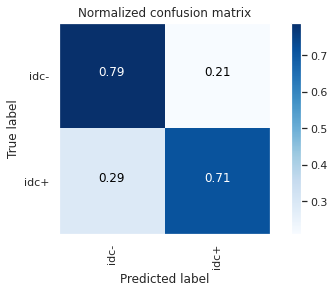

Epoch 57/70
87/87 [==============================] - 409s 5s/step - loss: 0.1330 - accuracy: 0.9429 - val_loss: 0.8969 - val_accuracy: 0.7500

Epoch 00057: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:16.625314


---------------------
| Balanced Accuracy  |
---------------------

    0.7555555555555555


---------------------
|      Accuracy      |
---------------------

    0.7555555555555555


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.73      0.80      0.77        90
           1       0.78      0.71      0.74        90

    accuracy                           0.76       180
   macro avg       0.76      0.76      0.76       180
weighted avg       0.76      0.76      0.76       180

--------------------
| Confusion Matrix |
--------------------

 [[72 18]
 [26 64]]


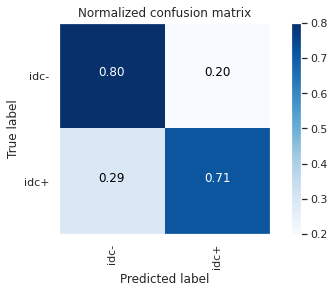

Epoch 58/70
87/87 [==============================] - 410s 5s/step - loss: 0.1130 - accuracy: 0.9653 - val_loss: 0.9488 - val_accuracy: 0.7614

Epoch 00058: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 18s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.882257


---------------------
| Balanced Accuracy  |
---------------------

    0.7666666666666666


---------------------
|      Accuracy      |
---------------------

    0.7666666666666667


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.78      0.74      0.76        90
           1       0.76      0.79      0.77        90

    accuracy                           0.77       180
   macro avg       0.77      0.77      0.77       180
weighted avg       0.77      0.77      0.77       180

--------------------
| Confusion Matrix |
--------------------

 [[67 23]
 [19 71]]


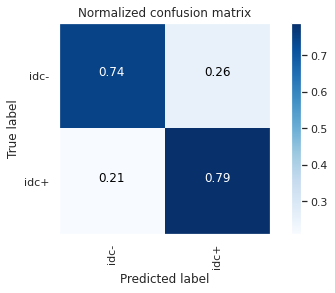

Epoch 59/70
87/87 [==============================] - 422s 5s/step - loss: 0.1383 - accuracy: 0.9480 - val_loss: 0.9290 - val_accuracy: 0.7102

Epoch 00059: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 18s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.555683


---------------------
| Balanced Accuracy  |
---------------------

    0.711111111111111


---------------------
|      Accuracy      |
---------------------

    0.7111111111111111


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.85      0.51      0.64        90
           1       0.65      0.91      0.76        90

    accuracy                           0.71       180
   macro avg       0.75      0.71      0.70       180
weighted avg       0.75      0.71      0.70       180

--------------------
| Confusion Matrix |
--------------------

 [[46 44]
 [ 8 82]]


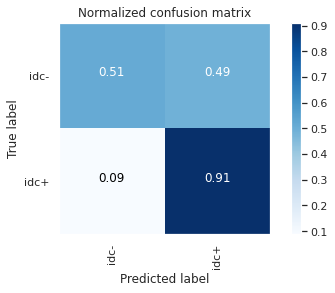

Epoch 60/70
87/87 [==============================] - 412s 5s/step - loss: 0.1011 - accuracy: 0.9653 - val_loss: 1.0236 - val_accuracy: 0.7784

Epoch 00060: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 18s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.943341


---------------------
| Balanced Accuracy  |
---------------------

    0.7833333333333334


---------------------
|      Accuracy      |
---------------------

    0.7833333333333333


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        90
           1       0.77      0.80      0.79        90

    accuracy                           0.78       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.78      0.78      0.78       180

--------------------
| Confusion Matrix |
--------------------

 [[69 21]
 [18 72]]


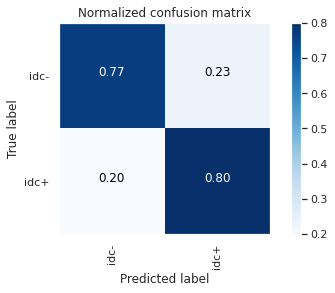

Epoch 61/70
87/87 [==============================] - 412s 5s/step - loss: 0.1344 - accuracy: 0.9516 - val_loss: 0.9155 - val_accuracy: 0.7443

Epoch 00061: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.447918


---------------------
| Balanced Accuracy  |
---------------------

    0.7444444444444445


---------------------
|      Accuracy      |
---------------------

    0.7444444444444445


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.85      0.59      0.70        90
           1       0.69      0.90      0.78        90

    accuracy                           0.74       180
   macro avg       0.77      0.74      0.74       180
weighted avg       0.77      0.74      0.74       180

--------------------
| Confusion Matrix |
--------------------

 [[53 37]
 [ 9 81]]


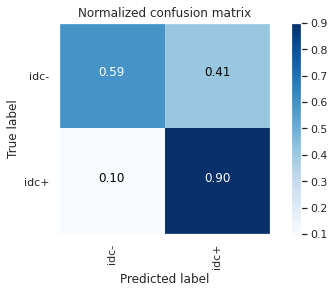

Epoch 62/70
87/87 [==============================] - 417s 5s/step - loss: 0.1324 - accuracy: 0.9473 - val_loss: 1.0890 - val_accuracy: 0.7557

Epoch 00062: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.231545


---------------------
| Balanced Accuracy  |
---------------------

    0.7555555555555555


---------------------
|      Accuracy      |
---------------------

    0.7555555555555555


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        90
           1       0.82      0.66      0.73        90

    accuracy                           0.76       180
   macro avg       0.77      0.76      0.75       180
weighted avg       0.77      0.76      0.75       180

--------------------
| Confusion Matrix |
--------------------

 [[77 13]
 [31 59]]


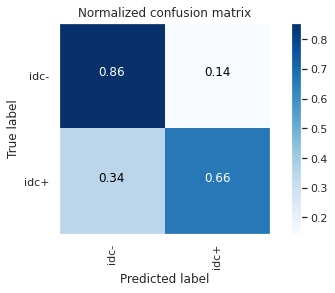

Epoch 63/70
87/87 [==============================] - 429s 5s/step - loss: 0.1076 - accuracy: 0.9574 - val_loss: 0.8823 - val_accuracy: 0.7784

Epoch 00063: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 18s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.727843


---------------------
| Balanced Accuracy  |
---------------------

    0.7777777777777778


---------------------
|      Accuracy      |
---------------------

    0.7777777777777778


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.77      0.80      0.78        90
           1       0.79      0.76      0.77        90

    accuracy                           0.78       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.78      0.78      0.78       180

--------------------
| Confusion Matrix |
--------------------

 [[72 18]
 [22 68]]


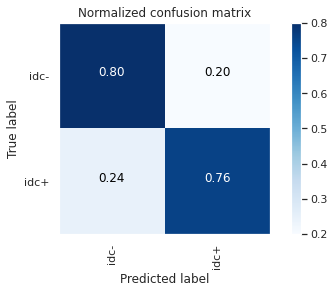

Epoch 64/70
87/87 [==============================] - 424s 5s/step - loss: 0.1091 - accuracy: 0.9639 - val_loss: 1.1645 - val_accuracy: 0.7045

Epoch 00064: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.492139


---------------------
| Balanced Accuracy  |
---------------------

    0.7055555555555555


---------------------
|      Accuracy      |
---------------------

    0.7055555555555556


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.93      0.44      0.60        90
           1       0.64      0.97      0.77        90

    accuracy                           0.71       180
   macro avg       0.78      0.71      0.68       180
weighted avg       0.78      0.71      0.68       180

--------------------
| Confusion Matrix |
--------------------

 [[40 50]
 [ 3 87]]


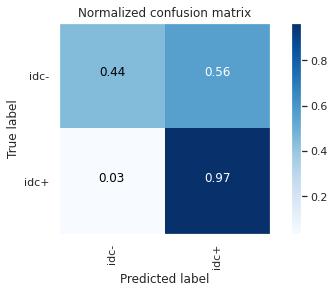

Epoch 65/70
87/87 [==============================] - 422s 5s/step - loss: 0.0791 - accuracy: 0.9711 - val_loss: 1.3541 - val_accuracy: 0.7386

Epoch 00065: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 18s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:17.772988


---------------------
| Balanced Accuracy  |
---------------------

    0.7444444444444445


---------------------
|      Accuracy      |
---------------------

    0.7444444444444445


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.73      0.78      0.75        90
           1       0.76      0.71      0.74        90

    accuracy                           0.74       180
   macro avg       0.75      0.74      0.74       180
weighted avg       0.75      0.74      0.74       180

--------------------
| Confusion Matrix |
--------------------

 [[70 20]
 [26 64]]


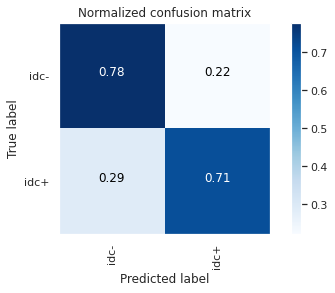

Epoch 66/70
87/87 [==============================] - 409s 5s/step - loss: 0.1125 - accuracy: 0.9646 - val_loss: 1.2201 - val_accuracy: 0.7614

Epoch 00066: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 17s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:20.532106


---------------------
| Balanced Accuracy  |
---------------------

    0.7611111111111111


---------------------
|      Accuracy      |
---------------------

    0.7611111111111111


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.72      0.87      0.78        90
           1       0.83      0.66      0.73        90

    accuracy                           0.76       180
   macro avg       0.77      0.76      0.76       180
weighted avg       0.77      0.76      0.76       180

--------------------
| Confusion Matrix |
--------------------

 [[78 12]
 [31 59]]


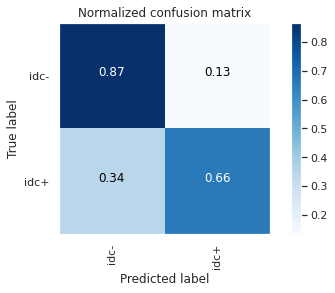

Epoch 67/70
87/87 [==============================] - 370s 4s/step - loss: 0.0732 - accuracy: 0.9762 - val_loss: 0.8998 - val_accuracy: 0.7500

Epoch 00067: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 14s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:13.603174


---------------------
| Balanced Accuracy  |
---------------------

    0.7555555555555555


---------------------
|      Accuracy      |
---------------------

    0.7555555555555555


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.73      0.82      0.77        90
           1       0.79      0.69      0.74        90

    accuracy                           0.76       180
   macro avg       0.76      0.76      0.75       180
weighted avg       0.76      0.76      0.75       180

--------------------
| Confusion Matrix |
--------------------

 [[74 16]
 [28 62]]


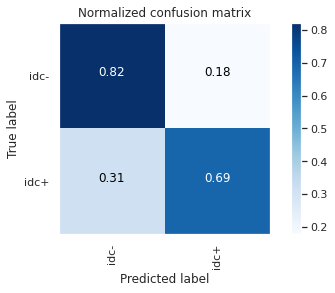

Epoch 68/70
87/87 [==============================] - 377s 4s/step - loss: 0.1090 - accuracy: 0.9624 - val_loss: 0.9246 - val_accuracy: 0.7614

Epoch 00068: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 16s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:16.189905


---------------------
| Balanced Accuracy  |
---------------------

    0.7666666666666666


---------------------
|      Accuracy      |
---------------------

    0.7666666666666667


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.79      0.72      0.76        90
           1       0.74      0.81      0.78        90

    accuracy                           0.77       180
   macro avg       0.77      0.77      0.77       180
weighted avg       0.77      0.77      0.77       180

--------------------
| Confusion Matrix |
--------------------

 [[65 25]
 [17 73]]


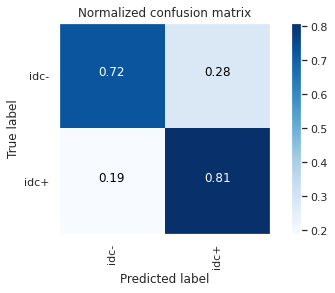

Epoch 69/70
87/87 [==============================] - 393s 5s/step - loss: 0.1027 - accuracy: 0.9624 - val_loss: 1.0810 - val_accuracy: 0.7045

Epoch 00069: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 18s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:18.686267


---------------------
| Balanced Accuracy  |
---------------------

    0.7055555555555555


---------------------
|      Accuracy      |
---------------------

    0.7055555555555556


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.66      0.83      0.74        90
           1       0.78      0.58      0.66        90

    accuracy                           0.71       180
   macro avg       0.72      0.71      0.70       180
weighted avg       0.72      0.71      0.70       180

--------------------
| Confusion Matrix |
--------------------

 [[75 15]
 [38 52]]


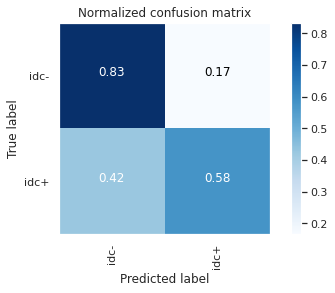

Epoch 70/70
87/87 [==============================] - 384s 4s/step - loss: 0.0998 - accuracy: 0.9632 - val_loss: 0.9254 - val_accuracy: 0.7273

Epoch 00070: val_loss did not improve from 0.43858
Predicting test data
12/12 [==============================] - 16s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:15.662381


---------------------
| Balanced Accuracy  |
---------------------

    0.7333333333333334


---------------------
|      Accuracy      |
---------------------

    0.7333333333333333


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.74      0.71      0.73        90
           1       0.72      0.76      0.74        90

    accuracy                           0.73       180
   macro avg       0.73      0.73      0.73       180
weighted avg       0.73      0.73      0.73       180

--------------------
| Confusion Matrix |
--------------------

 [[64 26]
 [22 68]]


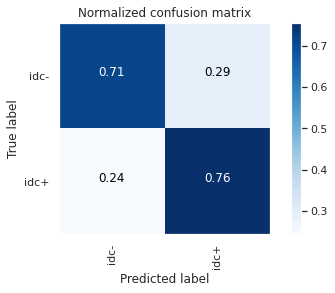

In [38]:
'''
#using augmentation data
history = model.fit_generator(train_generator, 
                              steps_per_epoch = len(train_data) // 16,
                              validation_data=val_generator,
                              validation_steps= len(test_data)// 16,
                              class_weight =class_weights,
                              epochs = 70,
                              callbacks = get_callbacks(),
                              verbose = 1
                              )
#using raw data
history = model.fit_generator(train_data_label, 
                              steps_per_epoch = epoch_step,
                              validation_data=train_val_data,
                              epochs = 70,
                              validation_steps= val_step, 
                              class_weight =class_weights,
                              callbacks = get_callbacks(),
                              verbose = 1
                              )


epoch_step = (len(train_data) // 16)
print(epoch_step)
val_step=len(test_data)// 16
print(val_step)
train_val_data=(test_data, test_label)
#print(train_generator.shape)
train_data_label=(train_data,train_label)
#print(val_generator.shape)
#(self, generator, steps_per_epoch, epochs, verbose, callbacks, validation_data, validation_steps, validation_freq, class_weight, max_queue_size, workers, use_multiprocessing, shuffle, initial_epoch)

history = model.fit_generator( 
                        train_datagen.flow(train_data,train_label),
                        steps_per_epoch=epoch_step,
                        epochs = 70,
                        verbose = 1,
                        callbacks = get_callbacks(),
                        validation_data=(test_data,test_label),
                        validation_steps = val_step,
                        class_weight =weights
                        )

'''

history = model.fit_generator(train_generator,
                              steps_per_epoch = len(train_data) // 16,
                              validation_data=val_generator,
                              validation_steps= len(test_data)// 16,
                              epochs = epoch_4_test,
                              callbacks = get_callbacks(),
                              verbose = 1
                              )

# Loading Best Model

In [39]:
from keras.models import load_model
best_model = load_model('./best_model_multiclass_128.h5')

# Best Model Performance
def test_final_model(model, train_generator, test_generator, val_generator, y_train, y_test, y_val, class_labels, cm_normalize=True, \
                 print_cm=True):

Predicting test data
12/12 [==============================] - 19s 1s/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:18.824173


---------------------
| Balanced Accuracy  |
---------------------

    0.8333333333333333


---------------------
|      Accuracy      |
---------------------

    0.8333333333333334


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        90
           1       0.85      0.81      0.83        90

    accuracy                           0.83       180
   macro avg       0.83      0.83      0.83       180
weighted avg       0.83      0.83      0.83       180

--------------------
| Confusion Matrix |
--------------------

 [[77 13]
 [17 73]]


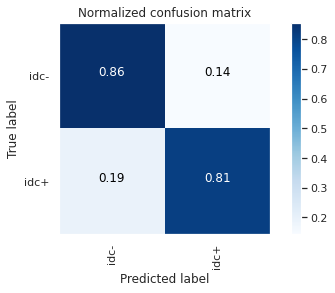

calculate other score
predicting validation data
27/27 [==============================] - 33s 1s/step
predicting test data
88/88 [==============================] - 123s 1s/step
Train accuracy Score------------>
49.000 %
Val accuracy Score--------->
77.381 %
Test accuracy Score--------->
83.333 %
F1 Score--------------->
83.325 %
Cohen Kappa Score------------->
66.667 %
Recall-------------->
83.333 %
Precision-------------->
83.399 %


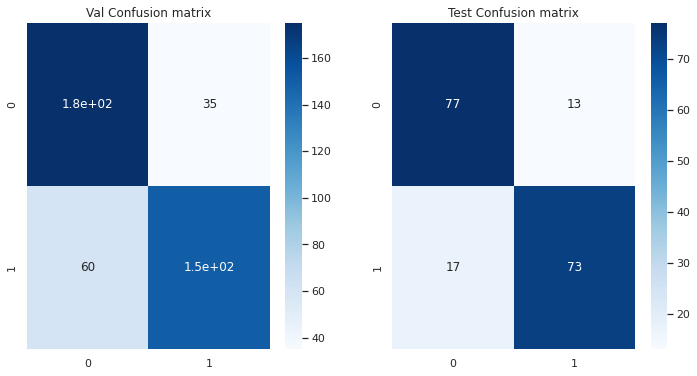

In [40]:
'''
test_model(best_model, 
           val_generator,
           y_test = np.argmax(test_label, axis = 1),
           class_labels = ['Normal', 'Viral', 'Bacterial'])
           '''
test_final_model(best_model, train_generator, 
               val_generator, val2_generator, 
               np.argmax(train_label, axis=1),
               np.argmax(test_label, axis=1),
               np.argmax(val_label, axis=1), 
               class_labels = ['idc-', 'idc+'])

# Plotting EpochPlot

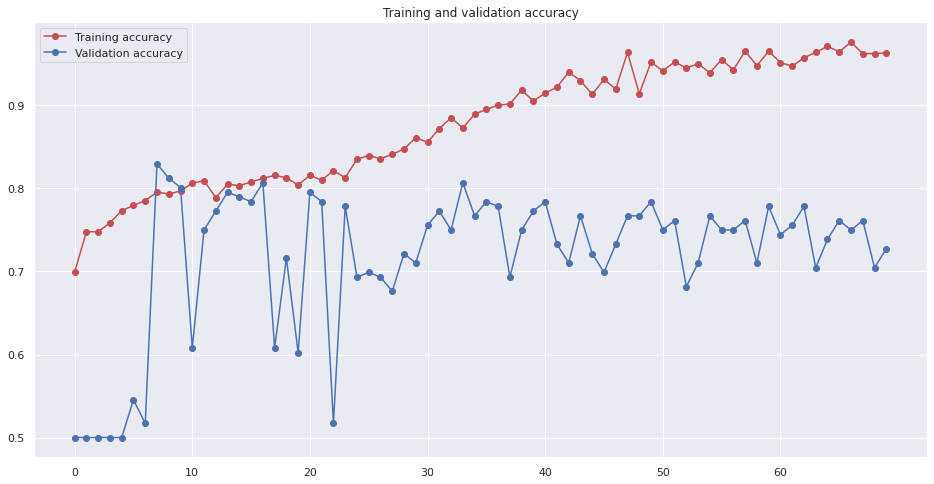

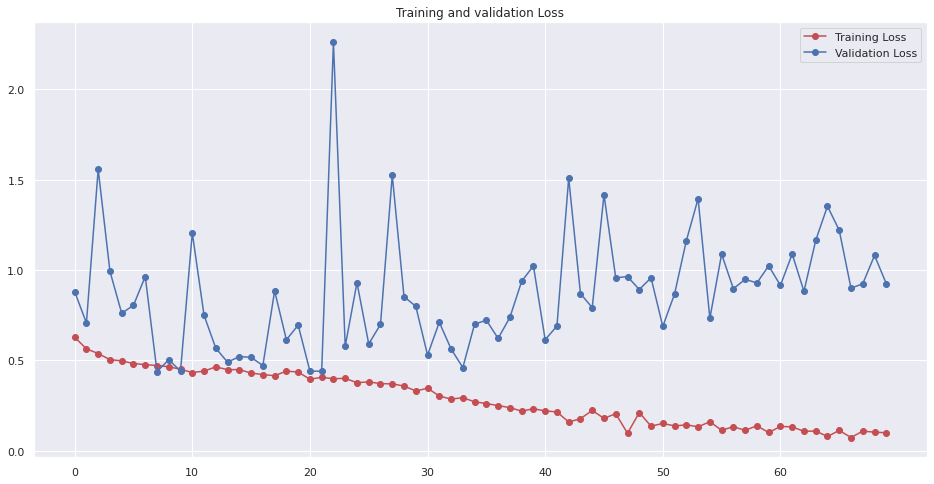

<Figure size 432x288 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = range(0,len(acc))
fig = plt.gcf()
fig.set_size_inches(16, 8)

plt.plot(epochs, acc, 'r', label='Training accuracy',marker = "o")
plt.plot(epochs, val_acc, 'b', label='Validation accuracy',marker = "o")
plt.title('Training and validation accuracy')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
plt.figure()

fig = plt.gcf()
fig.set_size_inches(16, 8)
plt.plot(epochs, loss, 'r', label='Training Loss',marker = "o")
plt.plot(epochs, val_loss, 'b', label='Validation Loss',marker = "o")
plt.title('Training and validation Loss')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
#plt.savefig('Multiclass Model .png')
plt.figure()
plt.show()


In [42]:
print(y_test)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

from sklearn.cross_validation import train_test_split# Grad-CAM and Saliency Map 
coming soon....